In [1]:
#pandas is a Library.Pandas Series is created by loading the datasets from existing storage.
import pandas as pd

In [2]:
#Importing data from CSV file
dataset=pd.read_csv("Salary_Data.csv")
dataset

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


In [3]:
#to split input
independent=dataset[["YearsExperience"]]
independent

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2
5,2.9
6,3.0
7,3.2
8,3.2
9,3.7


In [4]:
#to split output
dependent=dataset[["Salary"]]
dependent

,Salary
0,39343
1,46205
2,37731
3,43525
4,39891
5,56642
6,60150
7,54445
8,64445
9,57189


In [5]:
#X_train and y_train sets are used for training and fitting the model.
#The X_test and y_test sets are used for testing the model if it's predicting the right outputs/labels.
#We can explicitly test the size of the train and test sets.It is suggested to keep our train sets larger than the test sets.
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(independent,dependent, test_size=0.30,random_state=0)

In [6]:
#Learning Phase
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,Y_train)

LinearRegression()

In [7]:
#coef_ gives an array of weights estimated by linear regression
weight=regressor.coef_
weight

array([[9360.26128619]])

In [8]:
#The intercept in the regression model represents the mean value of the response variable when all the predictor variables in the model are equal to zero.
bais=regressor.intercept_
bais

array([26777.3913412])

In [9]:
#cross check function.Given a trained model, predict the label of a new set of data
y_pred=regressor.predict(X_test)

In [10]:
#cross check function. Value should be nearly 1 it is good model.
from sklearn.metrics import r2_score
r_score=r2_score(Y_test,y_pred)
r_score

0.9740993407213511

# Homoscedasticity & Heteroscedasticity

In [12]:
residuals = Y_test - y_pred

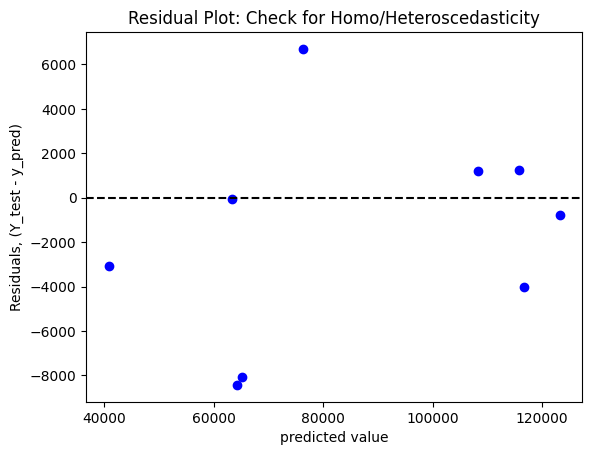

In [13]:
import matplotlib.pyplot as plt
plt.scatter(y_pred, residuals, color='blue')
plt.axhline(0, color='black', linestyle='--')
plt.xlabel("predicted value")
plt.ylabel("Residuals, (Y_test - y_pred)")
plt.title("Residual Plot: Check for Homo/Heteroscedasticity")
plt.show()

In [14]:
from statsmodels.stats.diagnostic import het_breuschpagan
import statsmodels.api as sm
import numpy as np

In [15]:
X_test_const = sm.add_constant(X_test)

In [16]:
_, pval, _, _ = het_breuschpagan(residuals, X_test_const)

print("p-value:", pval)

p-value: 0.1748375475435305


In [17]:
#Slight Heteroscedasticity Detected: Residuals are not randomly scattered — they show some variance pattern.(errors increasing and
#decreasing at different ranges). This means model might violate the homoscedasticity assumption of linear #regression.